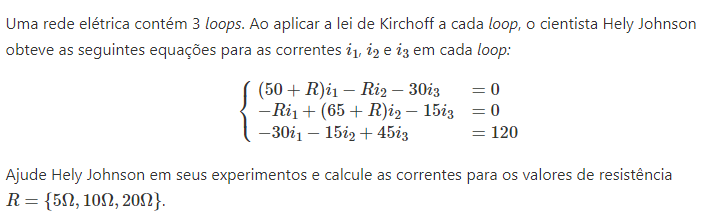

In [ ]:
from numpy.linalg import solve
import numpy as np

R = [5.,10.,15.]

# montagem do sistema
def resolve_sistema(R):
    A = np.array([ [50+R,-R,-30],[-R,65+R,-15],[-30,-15,45] ])
    b = np.array([0,0,120])
    x = solve(A,b)
    return x

# salva soluções agrupadas em um dicionário
sols = {}
for r in R:
    sols[r] = resolve_sistema(r)
    print('Para o valor de resistência R = {0:g} ohms: i1 = {1:g} A, i2 = {2:g} A, i3 = {3:g} A'.format(r, sols[r][0], sols[r][1], sols[r][2]))

Para o valor de resistência R = 5 ohms: i1 = 2.82927 A, i2 = 1.26829 A, i3 = 4.97561 A
Para o valor de resistência R = 10 ohms: i1 = 2.66667 A, i2 = 1.33333 A, i3 = 4.88889 A
Para o valor de resistência R = 15 ohms: i1 = 2.54545 A, i2 = 1.38182 A, i3 = 4.82424 A


In [ ]:
R = 10.
D = np.array([ [50+R,-R,-30],[-R,65+R,-15],[-30,-15,45] ])
b = np.array([0,0,120])

# fator
L = cholesky(D)

# passo 1
# Ly = b
y = solve(L,b)

# passo 2
# L^T x = y
x = solve(L.T,y)

# solução
x

array([2.66666667, 1.33333333, 4.88888889])

In [ ]:
x, sols[10] #comparando resultados

(array([2.66666667, 1.33333333, 4.88888889]),
 array([2.66666667, 1.33333333, 4.88888889]))

##Calcule o fator de Cholesky para a matriz


In [ ]:
from numpy.linalg import cholesky
import numpy as np

In [ ]:
R = 5.
B = np.array([ [50+R,-R,-30],[-R,65+R,-15],[-30,-15,45] ])

L = cholesky(B)
L #FATOR DE DECOMPOSICAO CHOLESKY

array([[ 7.41619849,  0.        ,  0.        ],
       [-0.67419986,  8.33939174,  0.        ],
       [-4.04519917, -2.12572731,  4.91097211]])

In [ ]:
#DECOMPOSICAO CHOLESKY
np.matmul(L,L.T)

array([[ 55.,  -5., -30.],
       [ -5.,  70., -15.],
       [-30., -15.,  45.]])

In [ ]:
B

array([[ 55.,  -5., -30.],
       [ -5.,  70., -15.],
       [-30., -15.,  45.]])

In [ ]:
# A MATRIZ É SIMETRICA QUANDO A DECOMPOSIÇAO É == A MATRIZ ORIGINAL
B == np.matmul(L,L.T)

array([[ True, False,  True],
       [False,  True, False],
       [ True, False, False]])

##Verificar se uma matriz simétrica é positiva definida.

In [ ]:
# cria outra matriz simétrica
D = np.tril(B) + 1
D = np.tril(D) + np.tril(D,-1).T
D

array([[ 56.,  -4., -29.],
       [ -4.,  71., -14.],
       [-29., -14.,  46.]])

In [ ]:
# matriz é POSITIVA DEFINIDA QUANDO RODA, SE DER ERRO NAO É POSITIVA DEFINIDA
cholesky(D)

array([[ 7.48331477,  0.        ,  0.        ],
       [-0.53452248,  8.40917866,  0.        ],
       [-3.87528801, -1.91117697,  5.22776678]])

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Funções Implementadas

def gauss_simples(AB):
    '''Realiza o cálculo de um sistema linear através do método de eliminação de Gauss sem pivotamento.

    Sinopse:
         X = gauss_simples(AB)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear

    Saídas:
         X - Vetor solução do sistema linear

         @ney
    '''

    # Eliminação progressiva de variáveis
    for i in range(len(AB)):
        for j in range(len(AB)):
            if (j > i):
                m = AB[j,i]/AB[i,i] # Fator multiplicador
                AB[j,:] -= m*AB[i,:] # Eliminação de variável

    # Substituição regressiva
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = np.zeros((len(AB),1))

    for i in range(len(A)-1, -1, -1):
        for j in range(len(A)):
            X[i] -= A[i,j]*X[j]
        X[i] += B[i]
        X[i] /= A[i,i]

    X = np.around(X, decimals=3)

    return X

def gauss_pivparc(AB):
    '''Realiza o cálculo de um sistema linear através do método de eliminação de Gauss com pivotamento parcial.

    Sinopse:
         X = gauss_pivparc(AB)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear

    Saídas:
         X - Vetor solução do sistema linear

         @ney
    '''

    # Eliminação progressiva de variáveis
    for i in range(len(AB)):
        if (i < len(AB)): # Pivotamento parcial
            AB_new = np.flip(AB[i:, i:], 0)
            AB[i:, i:] = AB_new
        for j in range(len(AB)):
            if (j > i):
                m = AB[j,i]/AB[i,i] # Fator multiplicador
                AB[j,:] -= m*AB[i,:] # Eliminação de variável

    # Substituição regressiva
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = np.zeros((len(AB),1))

    for i in range(len(A)-1, -1, -1):
        for j in range(len(A)):
            X[i] -= A[i,j]*X[j]
        X[i] += B[i]
        X[i] /= A[i,i]

    X = np.around(X, decimals=3)

    return X

def gaussjordan(AB):
    '''Realiza o cálculo de um sistema linear através do método de eliminação de Gauss-Jordan simples.

    Sinopse:
         X = gaussjordan(AB)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear

    Saídas:
         X - Vetor solução do sistema linear

         @ney
    '''

    for i in range(len(AB)):
        AB[i,:] /= AB[i,i]
        for j in range(len(AB)):
            if (j != i):
                AB[j,:] -= AB[j,i]*AB[i,:]

    AB = np.around(AB, decimals=3)

    return AB[:,-1]

def lu_solver(AB):
    '''Realiza o cálculo de um sistema linear através do método de decomposição LU.

    Sinopse:
         L, U, X = lu_solver(AB)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear

    Saídas:
         L (lu[0]) - Matriz triangular inferior
         U (lu[1]) - Matriz triangular superior
         X (lu[2]) - Vetor solução do sistema linear

         @ney
    '''

    # Decomposição LU
    U = np.copy(AB)
    U = U[:,0:-1]
    L = np.zeros((len(AB),len(AB)))

    for i in range(len(AB)):
        for j in range(len(AB)):
            if (j > i):
                m = U[j,i]/U[i,i]
                U[j,:] -= m*U[i,:]
                L[j,i] = m
            elif (j == i):
                L[i,i] = 1

    # Substituição progressiva
    B = np.copy(AB)
    B = B[:,-1]
    D = np.zeros((len(AB),1))

    for i in range(len(L)):
        for j in range(len(L)):
            if (i > j):
                D[i] -= L[i,j]*D[j]
        D[i] += B[i]

    # Substituição regressiva
    X = np.zeros((len(AB),1))

    for i in range(len(U)-1, -1, -1):
        for j in range(len(U)):
            X[i] -= U[i,j]*X[j]
        X[i] += D[i]
        X[i] /= U[i,i]

    L = np.around(L, decimals=3)
    U = np.around(U, decimals=3)
    X = np.around(X, decimals=3)

    return (L, U, X)

def cholesky(AB):
    '''Realiza o cálculo de um sistema linear através do método LU, por decomposição de Cholesky.

    Sinopse:
         C = cholesky(AB)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear

    Saídas:
         G (C[0]) - Matriz triangular inferior
         X (C[1]) - Vetor solução do sistema linear

         @ney
    '''

    # Decomposição de Cholesky
    A = np.copy(AB)
    A = A[:,0:-1]
    G = np.zeros((len(A),len(A)))

    for k in range(len(A)):
        for i in range(k):
            s1 = 0
            for j in range(i):
                s1 += G[i,j]*G[k,j]
            G[k,i] = (A[k,i] - s1)/G[i,i]
        s2 = 0
        for j in range(k):
            s2 += (G[k,j])**2
        G[k,k] = np.sqrt(A[k,k] - s2)

    # Substituição progressiva
    B = np.copy(AB)
    B = B[:,-1]
    D = np.zeros((len(AB),1))

    for i in range(len(G)):
        for j in range(len(G)):
            if (i > j):
                D[i] -= G[i,j]*D[j]
        D[i] += B[i]
        D[i] /= G[i,i]

    # Substituição regressiva
    GT = G.transpose()
    X = np.zeros((len(AB),1))

    for i in range(len(GT)-1, -1, -1):
        for j in range(len(GT)):
            X[i] -= GT[i,j]*X[j]
        X[i] += D[i]
        X[i] /= GT[i,i]

    G = np.around(G, decimals=3)
    X = np.around(X, decimals=3)

    return G,X

In [ ]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

In [ ]:
# Funções Implementadas

# Solução de Sistemas

def gaussjacobi(AB,ER,X0):
    '''Realiza o cálculo de um sistema linear através do método de iterativo de Gauss-Jacobi.

    Sinopse:
         X = gaussjacobi(AB,ER,X0)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução

    Saídas:
         X - Vetor solução do sistema linear

         @ney
    '''

    A = AB[:,0:-1]
    B = AB[:,-1]
    X = X0
    erro = 1
    interacoes = 0

    while (erro > ER):
        Xp = np.copy(X)
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if (i != j):
                    s += A[i,j]*Xp[j]
            X[i] = (B[i] - s)/A[i,i]
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)

        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])
        interacoes+=1

    X = np.around(X, decimals=3)

    return X

def gaussseidel(AB,ER,X0):
    ''' Função que realiza o cálculo de um sistema linear através do método de iterativo de Gauss-Seidel.

    Sinopse:
         X = gaussseidel(AB,ER,X0)

    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução

    Saídas:
         X - Vetor solução do sistema linear

         @ney
    '''

    A = AB[:,0:-1]
    B = AB[:,-1]
    X = X0
    erro = 1
    interacoes = 0

    while (erro > ER):
        Xp = np.copy(X)
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if (i != j):
                    s += A[i,j]*X[j]
            X[i] = (B[i] - s)/A[i,i]
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)

        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])
        interacoes+=1

    X = np.around(X, decimals=3)

    return X

def jacobian(F,Xs):
    '''Função que realiza o cálculo da matriz jacobiana.

    Sinopse:
         J = jacobian(F,Xs)

    Entradas:
         F - Vetor contendo as equações (simbólicas) do sistema não-linear
         Xs - Vetor contendo as variáveis (simbólicas) do sistema não-linear

    Saídas:
         J - Matriz jacobiana (simbólica)

         @ney
    '''
    J = sy.zeros(len(Xs), len(Xs))

    for i in range(len(Xs)):
        for j in range(len(Xs)):
            J[i,j] = sy.diff(F[i],Xs[j])

    return J

def newtonnaolin(F,Xs,ER,X0):
    '''Função que realiza o cálculo de um sistema não-linear através do método de iterativo de Newton.

    Sinopse:
         X = newtonnaolin(F,Xs,ER,X0)

    Entradas:
         F  - Vetor (sy.Matrix) contendo as equações (simbólicas) do sistema não-linear
         Xs - Vetor (sy.Matrix) contendo as variáveis (simbólico) do sistema não linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução

    Saídas:
         X - Vetor solução do sistema linear

         @ney
    '''

    J = jacobian(F,Xs)
    erro = 1
    X = np.copy(X0)

    while (erro > ER):
        Xp = np.copy(X)
        A = J[:,:]
        B = F[:,:]
        subs = []

        for i in range(len(Xs)):
            subs.append((Xs[i],X[i]))

        A = np.asarray(A.subs(subs), dtype=float)
        B = np.asarray(B.subs(subs), dtype=float)
        B *= -1

        S = np.linalg.solve(A,B)
        S = np.transpose(S)

        X += S[0]

        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)

        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])

    X = np.around(X, decimals=3)

    return X

# Interpolação

def int_newton(X, Y, x0):
    '''Função que realiza a interpolação de grau n de n+1 pontos dados, utilizando o método das diferenças divididas
    de Newton.

    Sinopse:
         y0 = int_newton(X, Y, x0)

    Entradas:
         X - Array com as coordenadas em x para os pontos dados
         Y - Array com as coordenadas em y para os pontos dados
         x0 - Ponto ao qual se deseja a estimativa f(x0)

    Saídas:
         y0 - Estimativa desejada f(x0)

         @ney
    '''

    n = len(X)
    x = sy.symbols("x")

    dx = []
    f = []
    aux = np.diff(Y)

    for i in range(1,n):
        dx.append(X[i:] - X[:-i])
        f.append(aux/dx[i-1]) # Diferenças Divididas
        aux = np.diff(f[i-1])

    b = []

    for i in f:
        b.append(i[0]) # Coeficientes do polinômio

    f = Y[0]
    aux = 1

    for i in range(n-1):
        aux *= x - X[i]
        f += b[i]*aux # Polinômio

    y0 = f.subs(x,x0) # Estimativa desejada

    return float(y0)

def int_lagrange(X, Y, x0):
    '''Função que realiza a interpolação de grau n de n+1 pontos dados, utilizando o método de Lagrange.

    Sinopse:
         y0 = int_lagrange(X, Y, x0)

    Entradas:
         X - Vetor com as coordenadas em x para pontos dados
         Y - Vetor com as coordenadas em y para pontos dados
         x0 - Ponto ao qual se deseja a estimativa f(x0)

    Saídas:
         y0 - Estimativa desejada f(x0)

         @ney
    '''

    n = len(X)
    x = sy.symbols("x")
    f = 0

    for i in range(n):
        L = 1
        for j in range(n):
            if (i != j):
                L *= (x - X[j])/(X[i] - X[j])
        f += L*Y[i] # Polinômio

    y0 = f.subs(x,x0) # Estimativa desejada

    return float(y0)

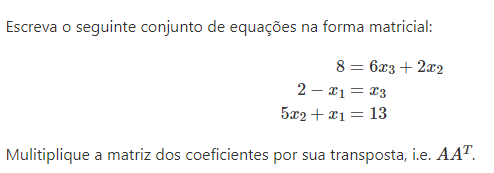

In [ ]:
# Solução

A = np.array([[0, 2, 6], [1, 0, 1], [1, 5, 0]])
AT = A.transpose()
B = np.dot(A,AT)

print("A matriz dos coeficientes desse sistema é: \n\n", A)
print("\nA sua transposta é: \n\n", AT)
print("\nLogo, o produto entre A e sua transposta é: \n\n", B)

A matriz dos coeficientes desse sistema é: 

 [[0 2 6]
 [1 0 1]
 [1 5 0]]

A sua transposta é: 

 [[0 1 1]
 [2 0 5]
 [6 1 0]]

Logo, o produto entre A e sua transposta é: 

 [[40  6 10]
 [ 6  2  1]
 [10  1 26]]


In [ ]:
#determinante
A = np.array([[0, 2, 5], [2, 1, 1], [3, 1, 0]])
det = np.linalg.det(A)
print("(i) det(A) = ", det)

(i) det(A) =  0.9999999999999991


In [ ]:

AB = np.array([[10., 2., -1., 27], [-3., -6., 2., 61.5], [1., 5., 5., -21.5]])
gauss_simples(AB)

array([[  5.489],
       [-11.095],
       [  5.697]])

In [ ]:
AB = np.array([[8., 2., -2., -2], [10., 2., -4., 4], [12., 2., 2., 6]])
gauss_pivparc(AB)

array([[  2.5],
       [-11.5],
       [ -0.5]])

In [ ]:
AB = np.array([[2., 1., -1., 1], [5., 2., 2., -4], [3., 1., 1., 5]])
gaussjordan(AB)

array([ 14., -32.,  -5.])

##Fatoração LU

In [ ]:
AB = np.array([[8., 4., -1., 11.], [-2., 5., 1., 4.], [2., -1., 6., 7.]])

L, U, X = lu_solver(AB)

A = np.copy(AB)
A = A[:,0:-1] #tira a coluna de resultados - ultima coluna

#Solução
AB = np.array([[8., 4., -1., 11.], [-2., 5., 1., 4.], [2., -1., 6., 7.]])

print("A solução do sistema é: \n", X)
print("\nA inversa de A é: \n", np.around(np.linalg.inv(A), decimals=3))
print("\nO produto entre as inversas de U e L é: \n", np.around(np.dot(np.linalg.inv(U),np.linalg.inv(L)), decimals=3))
print("\nO produto entre A e sua inversa é: \n", np.around(np.dot(A,np.linalg.inv(A))))

A solução do sistema é: 
 [[1.]
 [1.]
 [1.]]

A inversa de A é: 
 [[ 0.099 -0.074  0.029]
 [ 0.045  0.16  -0.019]
 [-0.026  0.051  0.154]]

O produto entre as inversas de U e L é: 
 [[ 0.099 -0.074  0.029]
 [ 0.045  0.16  -0.019]
 [-0.026  0.051  0.154]]

O produto entre A e sua inversa é: 
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


 ## matriz  simétrica, matriz singular, diagonalmente dominantes positivas-definidas

In [ ]:
import numpy as np

A = np.array([[2., 1.], [1., 3.]])
B = np.array([[2., 1., 0.], [0., 3., 0.], [1., 0., 4.]])
C = np.array([[4., 2., 6.], [3., 0., 7.], [-2., -1., -3.]])
D = np.array([[4., 0., 0., 0.], [6., 7., 0., 0.], [9., 11., 1., 0.], [5., 4., 1., 1.]])

def is_symmetric(matrix):
    return np.allclose(matrix, matrix.T)

def is_singular(matrix):
    return any(np.linalg.det(matrix[0:i, 0:i]) == 0 for i in range(1, len(matrix) + 1))

def is_diagonally_dominant(matrix):
    for i in range(len(matrix)):
        if abs(matrix[i,i]) <= np.sum(np.abs(matrix[i])) - abs(matrix[i,i]):
            return False
    return True

def is_positive_definite(matrix):
    return all(np.linalg.det(matrix[0:i, 0:i]) > 0 for i in range(1, len(matrix) + 1))

# Verificações para A
print("Matriz (a):")
print("Simétrica:", is_symmetric(A))
print("Singular:", is_singular(A))
print("Diagonalmente dominante:", is_diagonally_dominant(A))
print("Positiva-definida:", is_positive_definite(A))

# Verificações para B
print("\nMatriz (b):")
print("Simétrica:", is_symmetric(B))
print("Singular:", is_singular(B))
print("Diagonalmente dominante:", is_diagonally_dominant(B))
print("Positiva-definida:", is_positive_definite(B))

# Verificações para C
print("\nMatriz (c):")
print("Simétrica:", is_symmetric(C))
print("Singular:", is_singular(C))
print("Diagonalmente dominante:", is_diagonally_dominant(C))
print("Positiva-definida:", is_positive_definite(C))

# Verificações para D
print("\nMatriz (d):")
print("Simétrica:", is_symmetric(D))
print("Singular:", is_singular(D))
print("Diagonalmente dominante:", is_diagonally_dominant(D))
print("Positiva-definida:", is_positive_definite(D))


Matriz (a):
Simétrica: True
Singular: False
Diagonalmente dominante: True
Positiva-definida: True

Matriz (b):
Simétrica: False
Singular: False
Diagonalmente dominante: True
Positiva-definida: True

Matriz (c):
Simétrica: False
Singular: True
Diagonalmente dominante: False
Positiva-definida: False

Matriz (d):
Simétrica: False
Singular: False
Diagonalmente dominante: False
Positiva-definida: True


##CHOSLESKY

In [ ]:
B = np.array([[4., 1., 1., 1.], [1., 3., -1., 1.], [1., -1., 2., 0.], [1., 1., 0., 2.]])
G, X = cholesky(B)
G

#SEM SER AUMENTADA TEM QUE COMENTAR A LINHA QUE TIRA A ULTIMA COLUNA NA FUNCAO
#FATORAÇAO DE CHOLESKY


array([[ 2.   ,  0.   ,  0.   ,  0.   ],
       [ 0.5  ,  1.658,  0.   ,  0.   ],
       [ 0.5  , -0.754,  1.087,  0.   ],
       [ 0.5  ,  0.452,  0.084,  1.24 ]])

In [ ]:
AB = np.array([[8., 20., 15., 50.], [20., 80., 50., 250.], [15., 50., 60., 100.]])
G, X = cholesky(AB)
print("A solução do sistema é: \n", G)

#decomposição de Cholesky

##CONDICIONAL E GAUSS JACOBI E SEIDEL

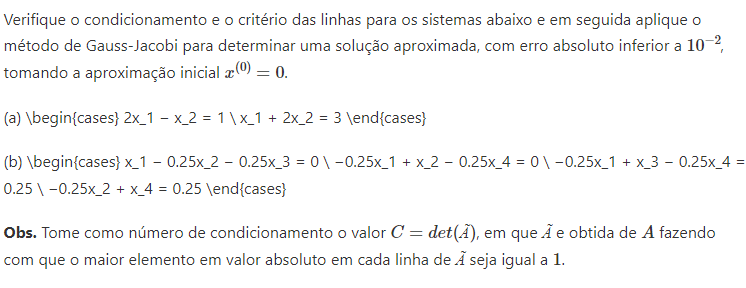

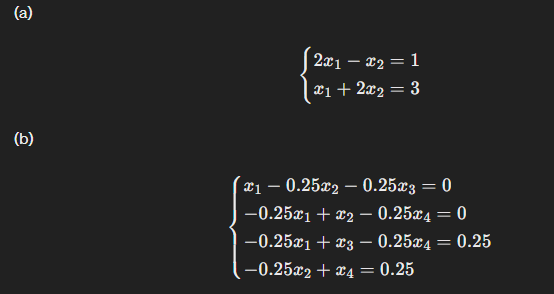

In [ ]:

A = np.array([[2., -1.], [1., 2.]]) # MATRIZ NORMAL
B = np.array([[1.], [3.]]) # RESULTADO
X = np.array([[0.], [0.]])
EA = 10**(-2)
erro = 1

while (erro > EA):
    Xp = np.copy(X)
    for i in range(len(A)):
        s = 0
        for j in range(len(A)):
            if (i != j):
                s += A[i,j]*Xp[j]
        X[i] = (B[i] - s)/A[i,i]
    erro = np.amax(np.absolute(X - Xp))

X = np.around(X, decimals=3)

print("(a)\nO número C de condicionamento é:", np.around(np.linalg.det(A), decimals=3)) #CONDICIONAL É O DETERMINANTE
print("\nA solução do problema é:\n", X)


(a)
O número C de condicionamento é: 5.0

A solução do problema é:
 [[0.998]
 [1.002]]


In [ ]:
AB = np.array([[2., -1.,1.], [1., 2.,3.]]) #  MATRIZ COMPLETA

gaussjacobi(AB,EA,np.zeros(len(AB)))


(array([0.998, 1.002]), 9)

In [ ]:
gaussseidel(AB,EA,np.zeros(len(AB)))

#SE QUISER NUMERO DE INTERAÇOES SÓ ADD NO RETURN DA FUNCAO

(array([0.998, 1.001]), 5)

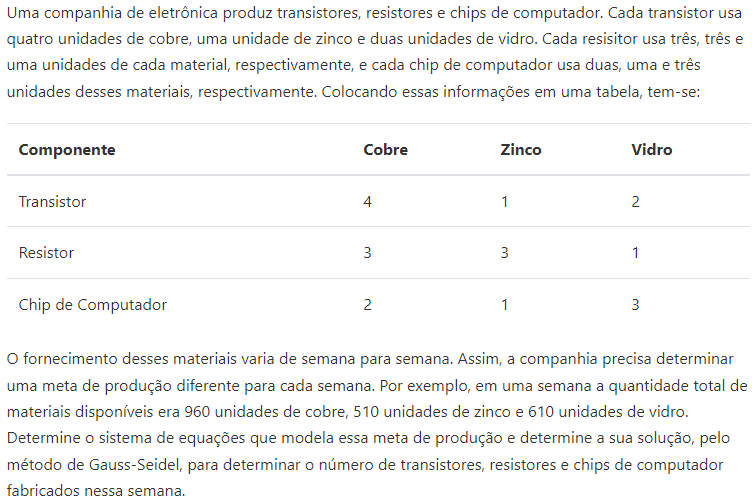

In [ ]:
# Solução

AB = np.array([[4., 3., 2., 960.], [1., 3., 1., 510.], [2., 1., 3., 610.]])
ER = 1/100
X0 = np.array([[0.], [0.], [0.]])

X = gaussseidel(AB,ER,X0)
X = np.transpose(np.rint(X))
print("[T,R,C] =", X[0])

[T,R,C] = [120. 100.  90.]


##Sistemas não-lineares NEWTON NAO LINEAR

In [ ]:
x, y = sy.symbols("x, y")
Xs = sy.Matrix([x, y])
ER = 1/100

# (i)
F = sy.Matrix([x**2 + y**2 - 2, x**2 - y**2 - 1])
X0 = np.array([1.2, 0.7])
X = newtonnaolin(F,Xs,ER,X0)
print("(i) A solução do problema é:", X)


(i) A solução do problema é: [1.225 0.707]
